# 1. Preliminaries

Set working directory

In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'/home/romagnolilab/Documents/GitHub/PROJECT'

Load Dependables

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap as ump

2023-03-25 16:23:44.231110: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 16:23:44.266394: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from src.data_preprocess import DataPreprocessing
from src.dimensionality import DimensionalityReduction


Load Data

In [4]:
pathX = "data/raw/RawData.xlsx"

preprocess = DataPreprocessing()
data = preprocess.load_data(pathX, target_path = None, is_dataframe = True, justFeatures = False)

In [5]:
data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100


Transform Data

In [6]:
norm_data = preprocess.scale_data()
norm_data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,0.350968,0.292521,0.238525,0.468659,0.777944,0.757940,0.516965,0.493909,0.450876,0.240103,...,0.266622,0.464588,0.0,0.241389,0.277760,0.580246,0.0,0.788559,0.310381,0.0
1,0.350702,0.308210,0.297161,0.459386,0.788652,0.739205,0.521489,0.509693,0.256541,0.238025,...,0.266895,0.470400,0.0,0.240813,0.280527,0.578484,0.0,0.769701,0.246380,0.0
2,0.350251,0.459634,0.209477,0.479083,0.778920,0.784015,0.529546,0.463563,0.609511,0.247526,...,0.267055,0.473396,0.0,0.250898,0.282877,0.586596,0.0,0.772480,0.194822,0.0
3,0.352372,0.300972,0.251013,0.442794,0.727265,0.789300,0.533128,0.363171,0.393308,0.267338,...,0.267687,0.476511,0.0,0.268356,0.278263,0.568077,0.0,0.771891,0.172568,0.0
4,0.350848,0.234122,0.252805,0.514226,0.781072,0.752830,0.536877,0.428209,0.375227,0.286009,...,0.263968,0.486108,0.0,0.289550,0.276511,0.576815,0.0,0.791836,0.218329,0.0


# 2. Dimensionality Reduction

# 2.6 UMAP

In [18]:
umap_2D_data = dreduction.fit_UMAP(state = 16)

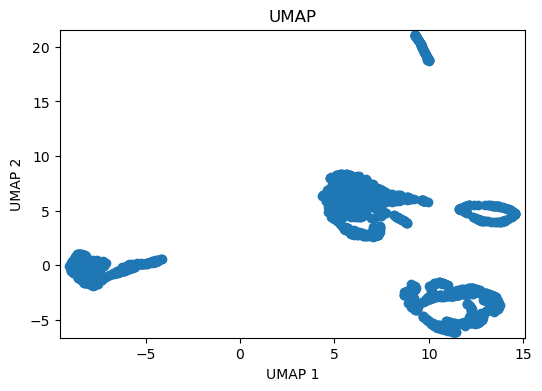

In [19]:
dreduction.plot_2D_scatter(data = umap_2D_data, type = 'UMAP')

# 3. Clustering

In [21]:
from src.clustering import ClusterAnalysis


## 3.6 UMAP data

In [73]:
UMAP = ClusterAnalysis(clusters = 5, data = umap_2D_data)

### 3.6.1 KMEans

In [74]:
# fit data and predict cluster
kmeans_UMAP_2D_data = UMAP.create_KMeans(state = 1, init = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


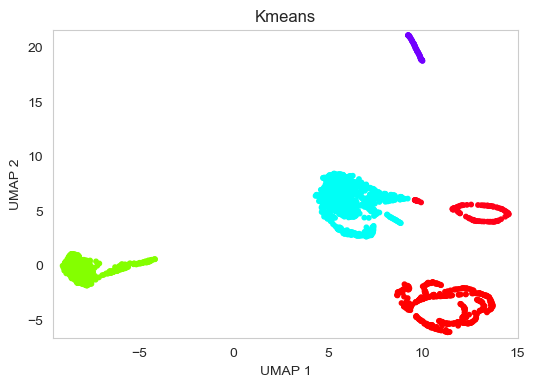

In [75]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'Kmeans'])

### 3.6.2 AgglomerativeClustering

In [76]:
# fit data and predict cluster
aggloClust_UMAP_2D_data = UMAP.create_AgglomerativeClustering()

Estimated number of clusters: 5
Estimated number of noise points: 0


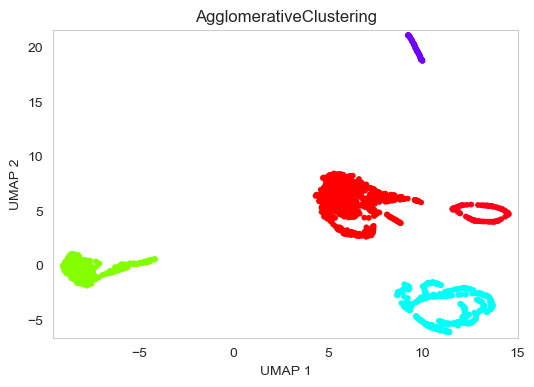

In [77]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'AgglomerativeClustering'])

### 3.6.3 DBSCAN

In [78]:
# fit data and predict cluster
dbscan_with_UMAP = UMAP.create_DBSCAN(eps_ = 0.5, min_sample_ = 5)


Estimated number of clusters: 5
Estimated number of noise points: 0


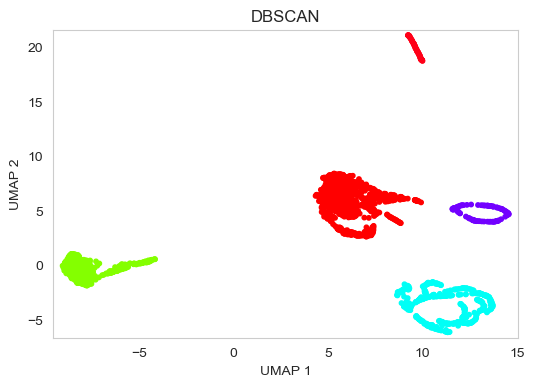

In [79]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'DBSCAN'])

### 3.5.4 HDBSCAN

In [80]:
# fit data and predict cluster
hdbscan_UMAP_2D_data = UMAP.create_HDBSCAN(min_cluster_size_ = 5, min_samples_ = 15)

Estimated number of clusters: 5
Estimated number of noise points: 0


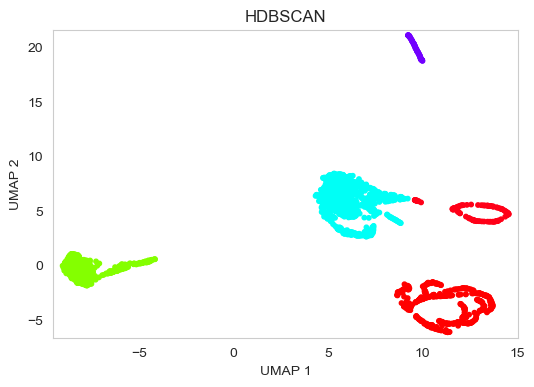

In [81]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'HDBSCAN'])

# Comparison

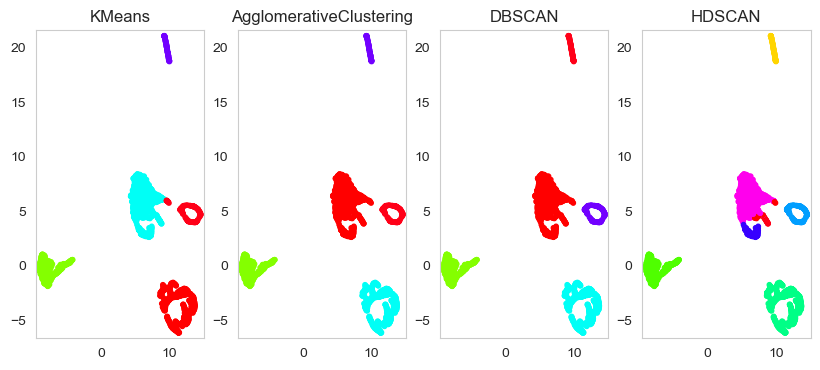

<Figure size 640x480 with 0 Axes>

In [82]:
UMAP.compare_cluster(fig_size = (10, 4), type = 'UMAP')

# UMAP

In [84]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

In [93]:
input = umap_2D_data
cluster_list = ['KMeans', 'Agglom', 'DBSCAN', 'HDBSCAN']
data_list = [kmeans_UMAP_2D_data, aggloClust_UMAP_2D_data, dbscan_with_UMAP, hdbscan_UMAP_2D_data]

for title, data_ in zip(cluster_list, data_list):
    print(f"Type: {title}, score: {davies_bouldin_score(X = input, labels = data_)}")

Type: KMeans, score: 0.32389420612093095
Type: Agglom, score: 0.2977308308300886
Type: DBSCAN, score: 0.2977308308300886
Type: HDBSCAN, score: 0.7300577820329606


# 4. Classification 